#### Importing Libraries:

In [15]:
import os, sys
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import random
import pickle

#### Defining Targets:

In [16]:
base_dir = "./ranzcr_clip_catheter_line_classification/"
train_df = pd.read_csv(os.path.join(base_dir, "train.csv"))

#concat all the labels into a single number
target_cols = train_df.drop(['StudyInstanceUID', 'PatientID'], axis=1).columns.values.tolist() #remaining features, within a list
targets = train_df[target_cols].astype(str) #converting datapints to type string
# create a new col to store the label
train_df['combined_label'] = ''
for i in range(targets.shape[1]):
    train_df['combined_label'] += targets.iloc[:, i] #concat all feature values together (that is why we converted to type string above)(that being said, each instance in new column "combined_label" is basically a string of exactly 11 characters.)
# how many of each label there are
print(train_df.combined_label.value_counts()) #Thus, there are 211 unique values as a result. (can be checked using "train_df['combined_label'].unique().shape")
before_encoding = train_df['combined_label'] #to preserve the combos before label-encoding
#encode training labels
train_df['combined_label'] = LabelEncoder().fit_transform(train_df['combined_label'])
after_encoding = train_df['combined_label'] #to preserve the combos after label-encoding

00000000010    12763
00000000100     4038
00000001000     1678
00100010010     1428
00000000110      973
               ...  
00001001110        1
00000011011        1
10001000010        1
00100000101        1
10000011100        1
Name: combined_label, Length: 211, dtype: int64


In [17]:
before_encoding

0        00000010000
1        00100100010
2        00000000100
3        00000001000
4        00000000010
            ...     
30078    00100000110
30079    00000000010
30080    00100101010
30081    00000000100
30082    00100000010
Name: combined_label, Length: 30083, dtype: object

In [18]:
after_encoding

0        11
1        86
2         3
3         6
4         1
         ..
30078    64
30079     1
30080    93
30081     3
30082    60
Name: combined_label, Length: 30083, dtype: int32

In [19]:
train_df #Actually the naming might be misleading, but this is all the "data", not necessarily just the "training data".
#And the "target"s are the "combined_label" column, which can be decoded using the two lists "before_encoding" and "after_encoding".

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,combined_label
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1,11
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c,86
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5,3
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814,6
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30078,1.2.826.0.1.3680043.8.498.74257566841157531124...,0,0,1,0,0,0,0,0,1,1,0,5b5b9ac30,64
30079,1.2.826.0.1.3680043.8.498.46510939987173529969...,0,0,0,0,0,0,0,0,0,1,0,7192404d8,1
30080,1.2.826.0.1.3680043.8.498.43173270582850645437...,0,0,1,0,0,1,0,1,0,1,0,d4d1b066d,93
30081,1.2.826.0.1.3680043.8.498.95092491950130838685...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8,3


#### Resizing the Images to the Same Value:

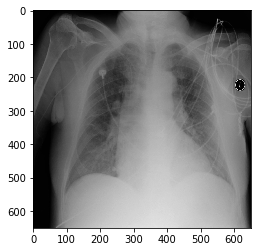

In [20]:
def load_resize_training_data(imageSize = 650, numSamples = 1000): #all image sizes: 650*650 #also changed from 10000 to 1000 due to my system memory.
    path = os.path.join(base_dir, "train/")
    trainingData = []
    i=0
    for img in os.listdir(path):
        if i == numSamples:
            break
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #plt.imshow will not result in a very fair respresentation.
        resized_array = cv2.resize(img_array, (imageSize, imageSize))
        trainingData.append([(resized_array), train_df.at[i, 'combined_label']])
        i += 1

    plt.imshow(trainingData[0][0], cmap = "gray")

    return trainingData

data = load_resize_training_data()

In [21]:
data

[[array([[ 0,  0,  2, ...,  2,  2,  1],
         [ 1,  1,  2, ...,  2,  2,  1],
         [ 1,  2,  2, ...,  2,  1,  1],
         ...,
         [ 3,  3,  3, ..., 31, 26, 15],
         [ 2,  2,  3, ..., 32, 25, 17],
         [ 1,  1,  2, ..., 19, 17, 10]], dtype=uint8),
  11],
 [array([[  3,   6,   6, ...,  13,  13,  10],
         [  6,   9,   8, ...,  20,  20,  16],
         [  5,   7,   7, ...,  19,  19,  14],
         ...,
         [ 63,  87,  85, ..., 164, 164, 118],
         [ 60,  84,  84, ..., 165, 171, 118],
         [ 38,  51,  53, ..., 111, 111,  77]], dtype=uint8),
  86],
 [array([[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [ 76, 105, 119, ...,   1,   6,   7],
         [ 75, 115, 121, ...,   3,  10,   6],
         [ 22,  27,  31, ...,   7,   8,   3]], dtype=uint8),
  3],
 [array([[  1,   1,   2, ...,  12,  14,   9],
         [  2,   2,   3, ...,  18,  19,  14],
         

In [24]:
len(data) #verified!

1000

In [22]:
data[0] #verified!

[array([[ 0,  0,  2, ...,  2,  2,  1],
        [ 1,  1,  2, ...,  2,  2,  1],
        [ 1,  2,  2, ...,  2,  1,  1],
        ...,
        [ 3,  3,  3, ..., 31, 26, 15],
        [ 2,  2,  3, ..., 32, 25, 17],
        [ 1,  1,  2, ..., 19, 17, 10]], dtype=uint8),
 11]

In [23]:
data[0][0].shape #verified!

(650, 650)

In [25]:
#shuffle dataset
random.shuffle(data)
data = np.array(data)
#save x data
pickle_out = open("X.pickle", "wb")
pickle.dump(data[:,0], pickle_out)
pickle_out.close()
#save y data
pickle_out = open("y.pickle", "wb")
pickle.dump(data[:,1], pickle_out)
pickle_out.close()